In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from platform import python_version

print('Python version on this Jupyter Notebook:', python_version())

Python version on this Jupyter Notebook: 3.7.10


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [6]:
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)

color = sns.color_palette()

In [8]:
data =pd.read_csv('../input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
data.shape

(891, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
data.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [15]:
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 891
Columns: 12


In [16]:
print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   866

Unique values :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [17]:
data.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
data.Survived.max()

1

In [19]:
data.Survived.min()

0

In [20]:
df = data.reset_index().drop("index", axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
corr = data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


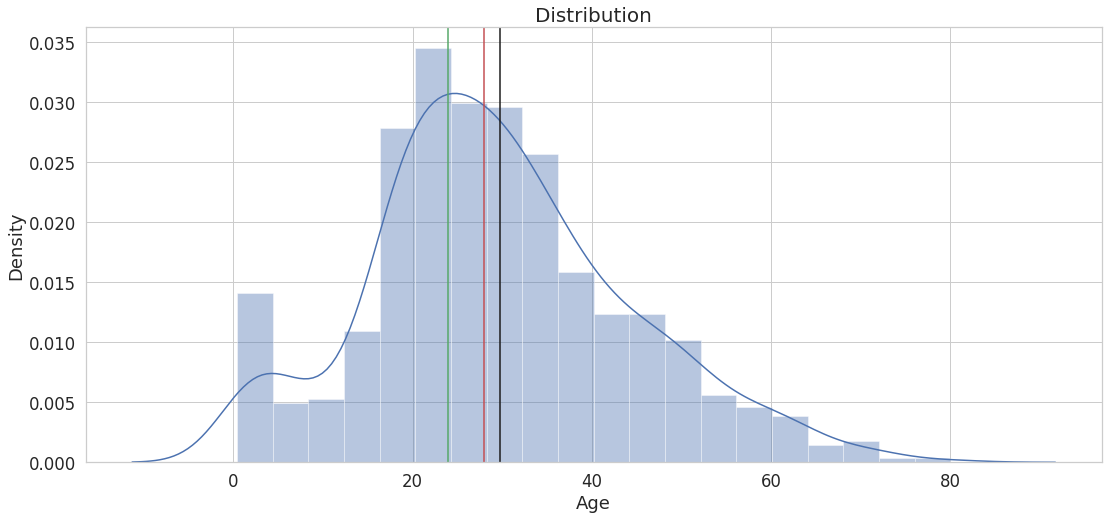

In [23]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(data['Age']);
plt.title("Distribution", fontsize=20)
plt.axvline(data['Age'].mean(), color='k')
plt.axvline(data['Age'].median(), color='r')
plt.axvline(data['Age'].mode()[0], color='g');

(7.5, -0.5)

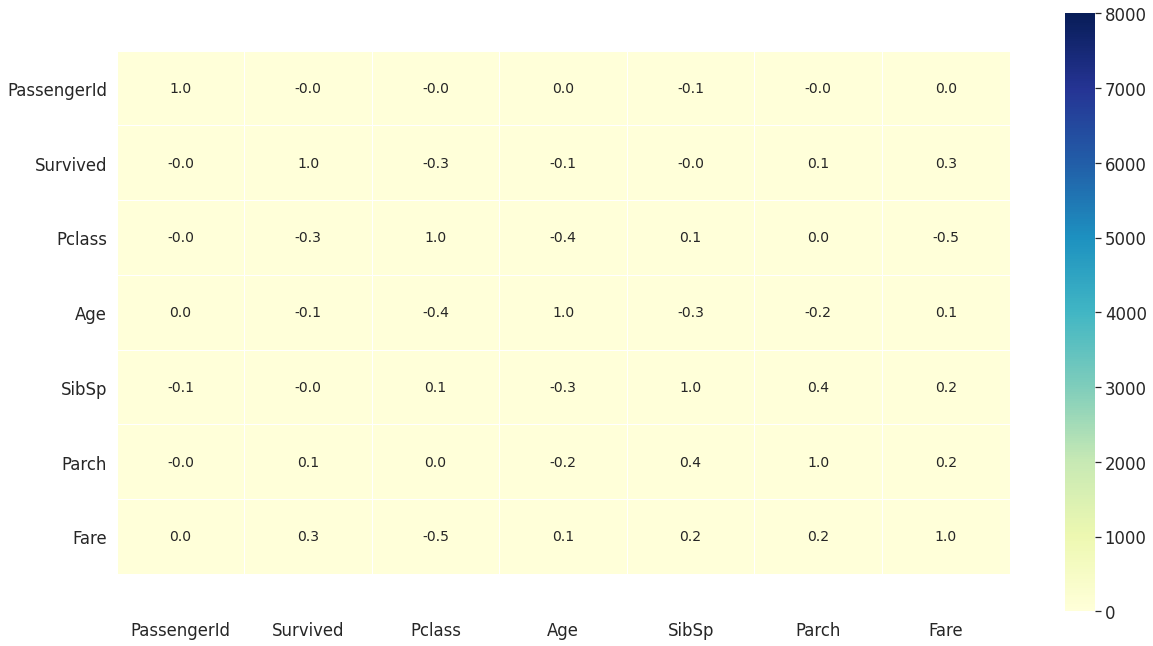

In [24]:
plt.figure(figsize=(20,11))

df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True, vmin=0, vmax=8000, cmap="YlGnBu", linewidths=.5, annot_kws={'size':14} ,fmt=".1f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

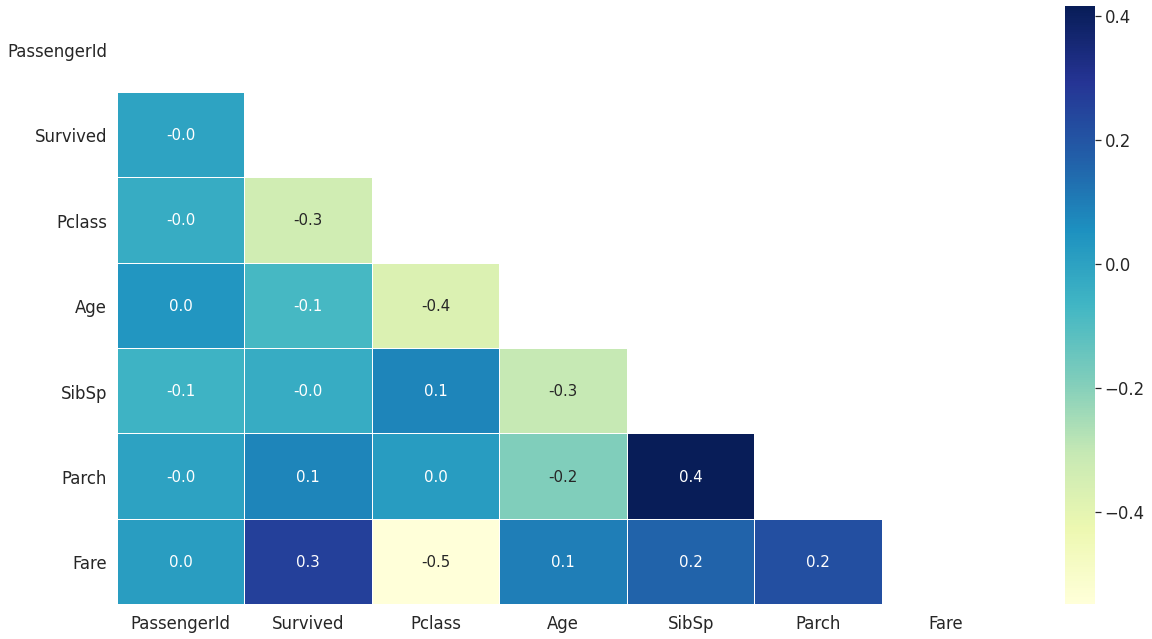

In [25]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap="YlGnBu", linewidths=.5, annot_kws={'size':15} ,fmt=".1f")
plt.show()

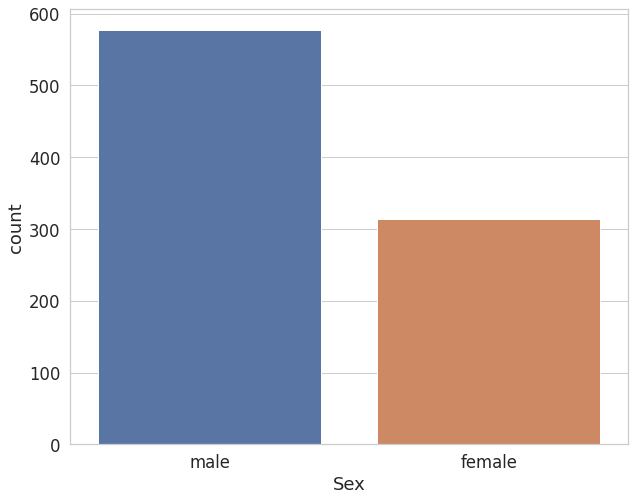

In [26]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(data["Sex"])

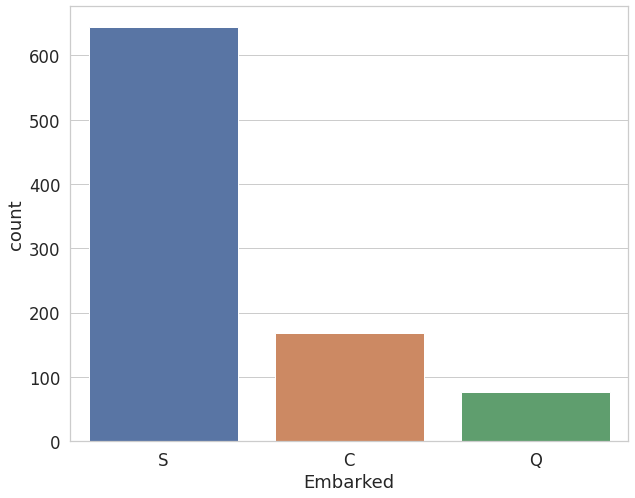

In [27]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(data["Embarked"])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

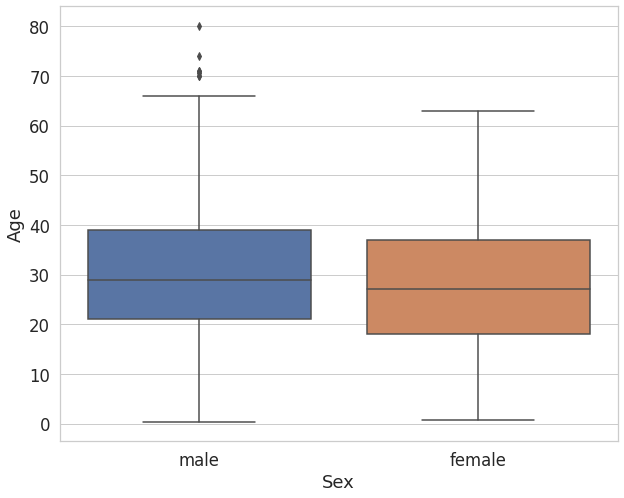

In [28]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="Sex" , y="Age", data = data)

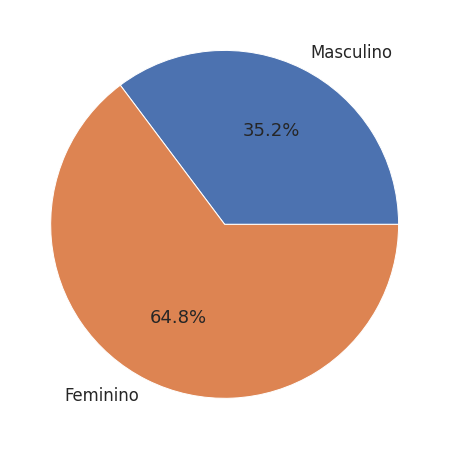

In [29]:
plt.figure(figsize=(15, 8))

plt.pie(data.groupby('Sex')['Sex'].count(), labels=['Masculino','Feminino'], autopct='%1.1f%%');

<AxesSubplot:xlabel='Sex', ylabel='Age'>

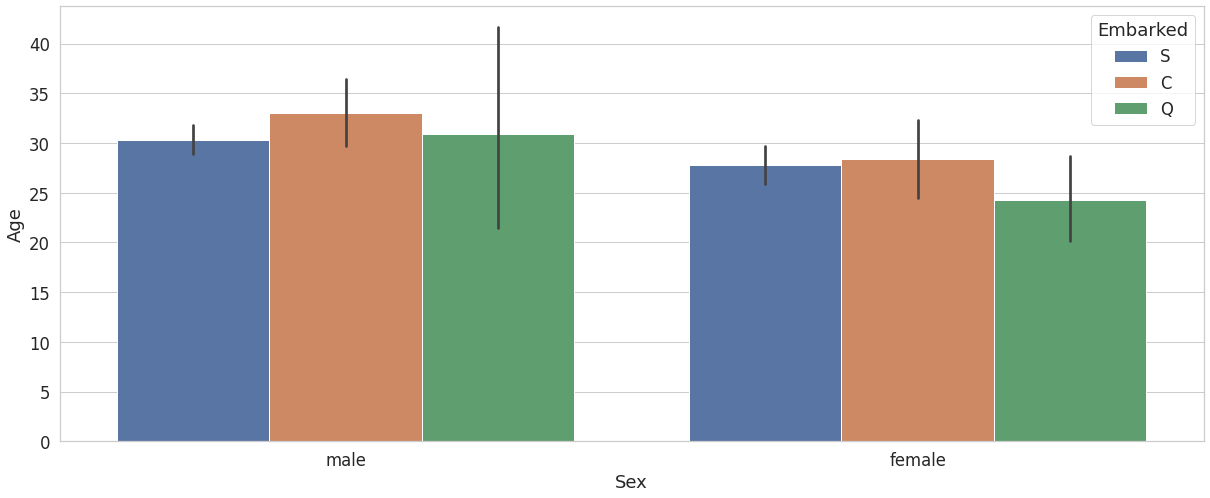

In [30]:
plt.figure(figsize=(20.5, 8))

sns.barplot(x="Sex", y="Age", data = data, hue="Embarked")

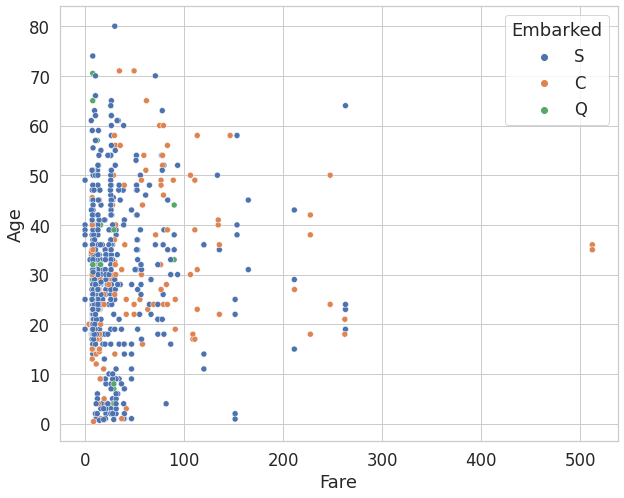

In [31]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(data=df, x = "Fare", y = "Age", hue = "Embarked")

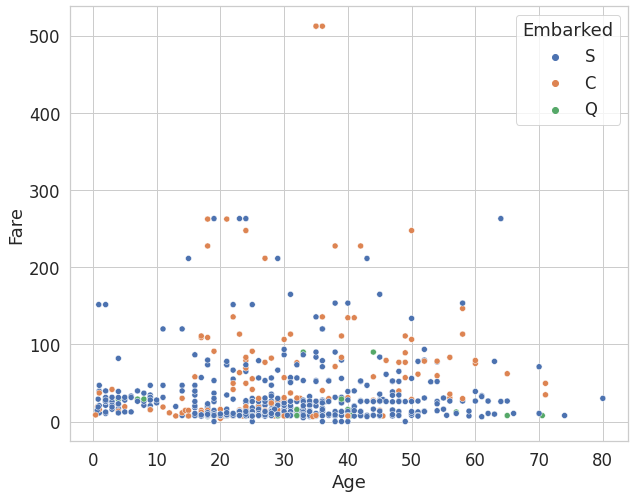

In [32]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(data=df, x = "Age", y = "Fare", hue = "Embarked")

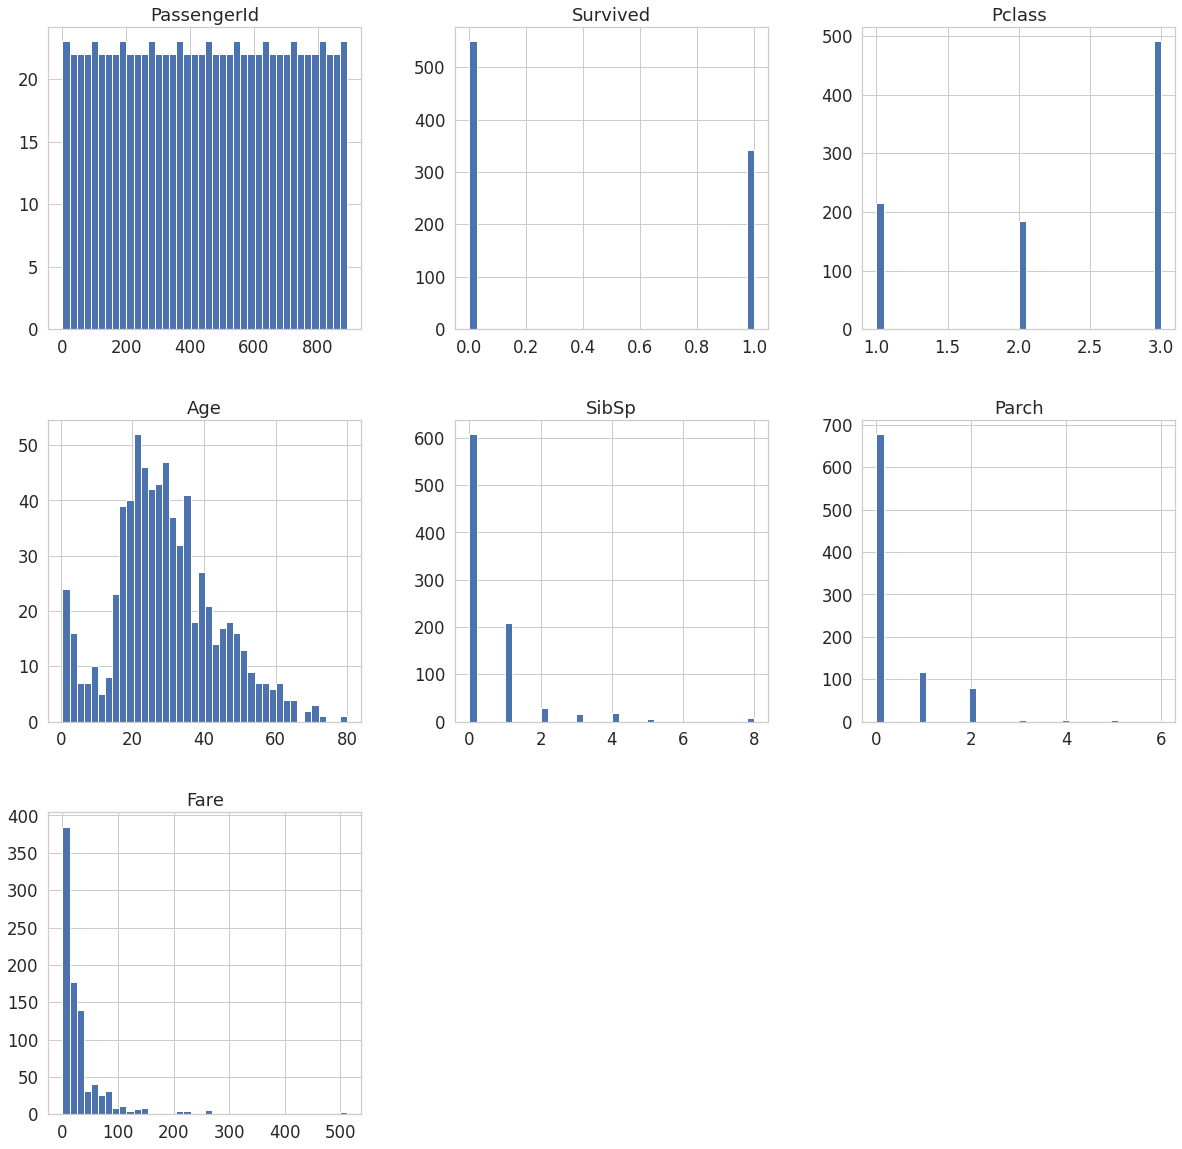

In [33]:
data.hist(bins = 40, figsize=(20.2, 20))
plt.show()

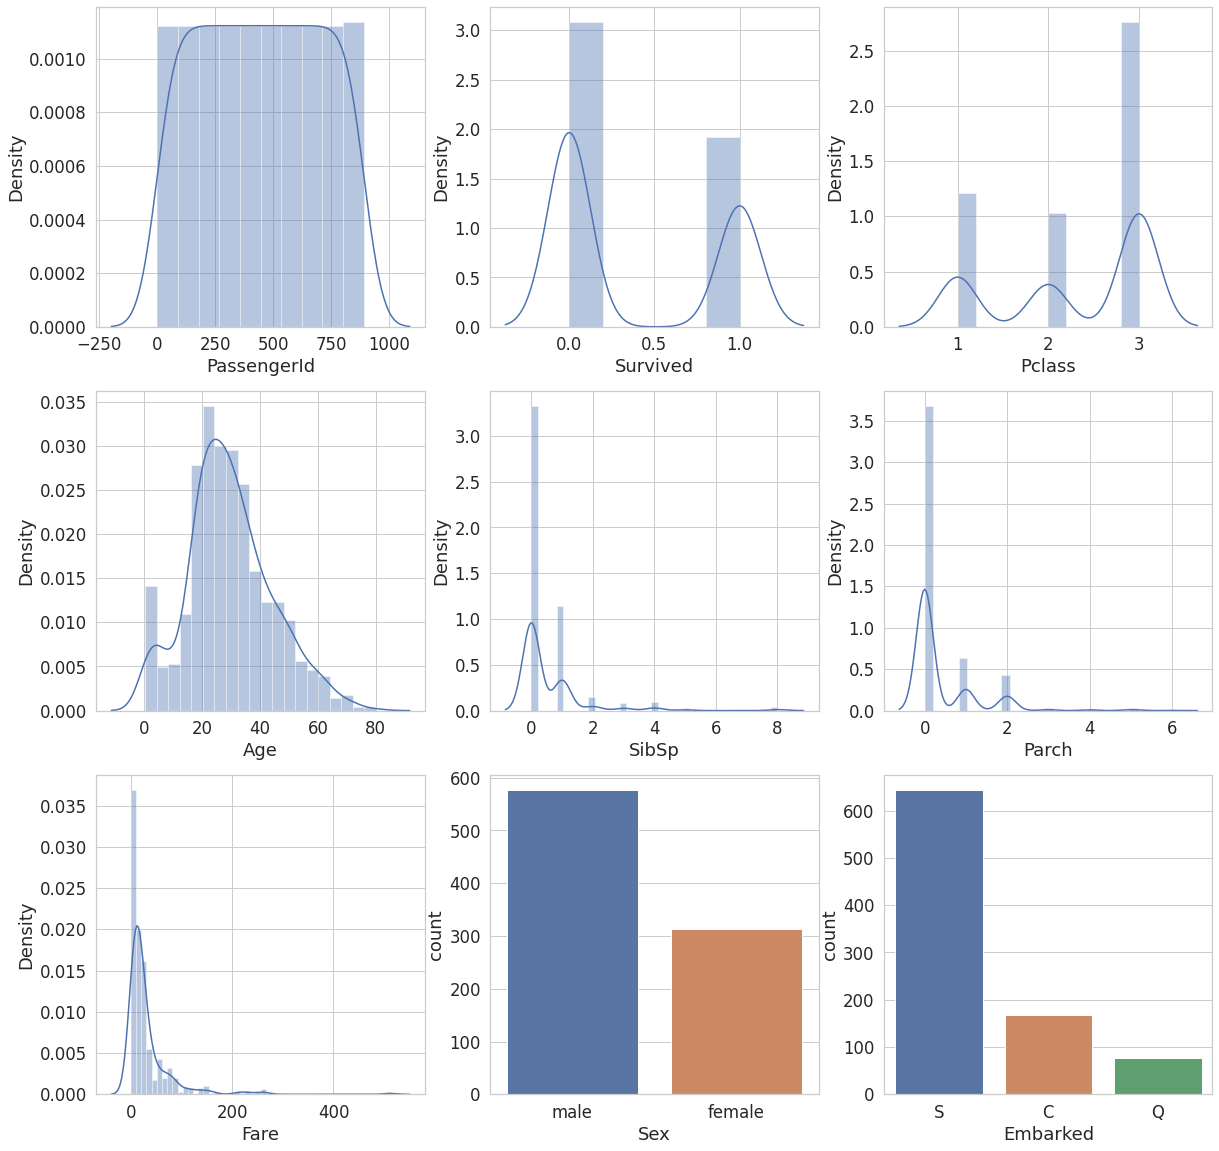

In [34]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(data["PassengerId"] , ax=axes[0, 0])
sns.distplot(data["Survived"] ,  ax=axes[0, 1])
sns.distplot(data["Pclass"] , ax=axes[0, 2])
sns.distplot(data["Age"], ax=axes[1, 0] )
sns.distplot(data["SibSp"] , ax=axes[1, 1] )
sns.distplot(data["Parch"] , ax=axes[1, 2] )
sns.distplot(data["Fare"] , ax=axes[2, 0])
sns.countplot(data["Sex"], ax=axes[2, 1])
sns.countplot(data["Embarked"], ax=axes[2, 2])

plt.show()

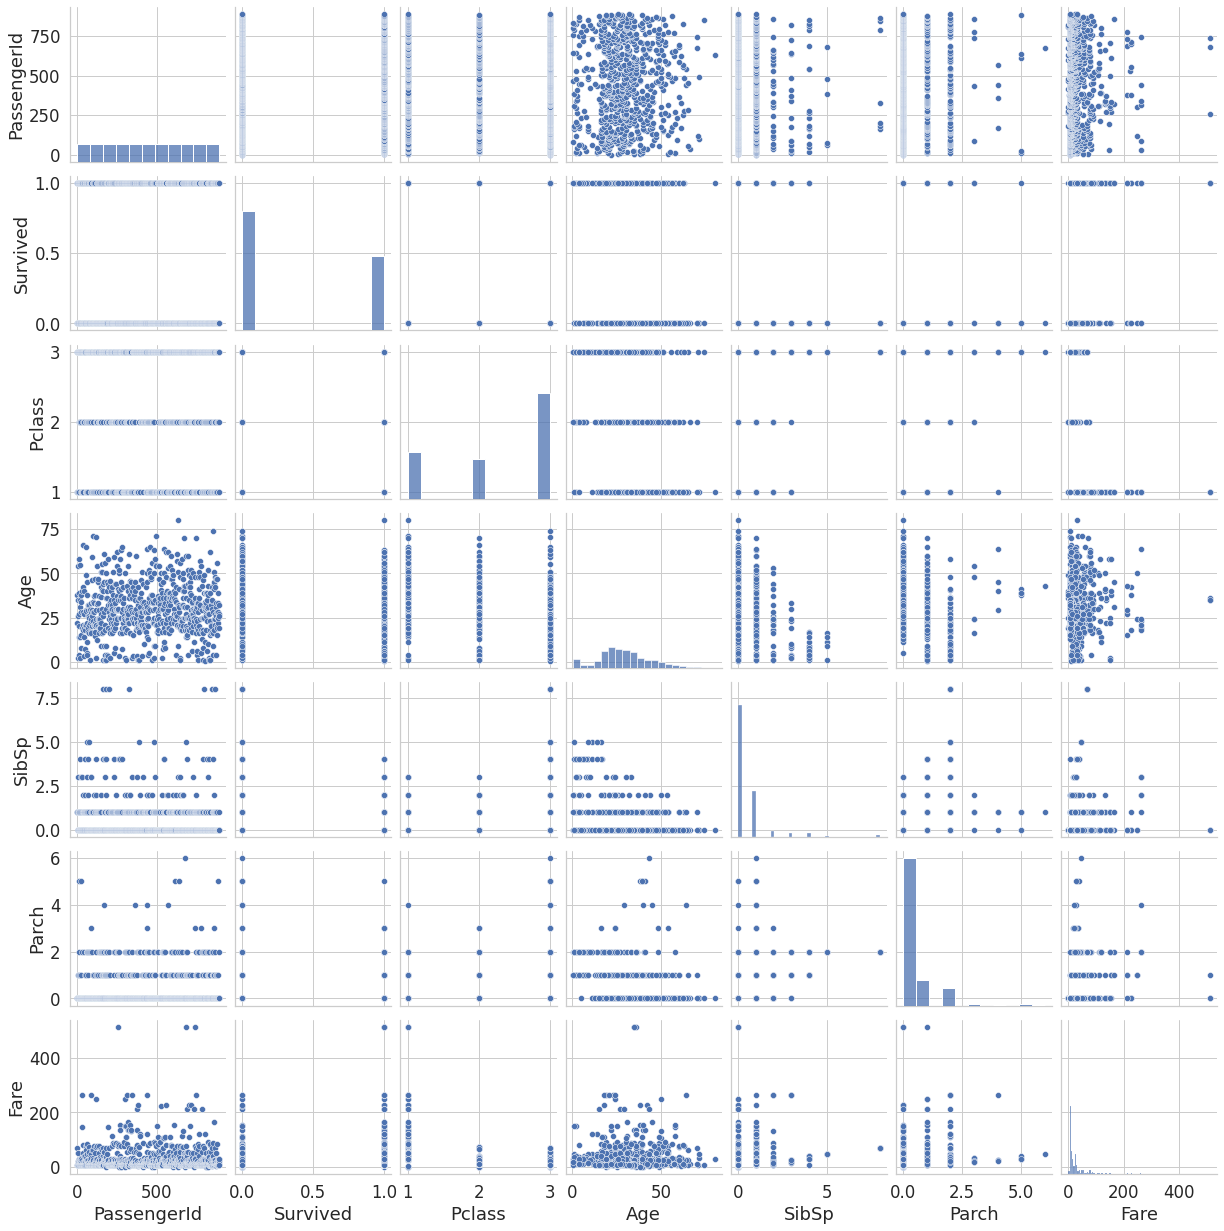

In [35]:
sns.pairplot(data)

In [36]:
data['Embarked'].loc[data['Embarked']=='C']=1
data['Embarked'].loc[data['Embarked']=='S']=0

data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0
887,888,1,1,female,19.0,0,0,30.0000,0
888,889,0,3,female,NaN,1,2,23.4500,0
889,890,1,1,male,26.0,0,0,30.0000,1


In [37]:
y = data['Survived']
x = data.drop('Survived', axis=1)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [39]:
x_train.shape

(712, 8)

In [40]:
y_train.shape

(712,)

In [41]:
x_test.shape

(179, 8)

In [42]:
y_test.shape

(179,)

# Machine learning - Pipeline

In [43]:
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

model_pipeline = Pipeline(steps = [
    ('one-hot encoder', OneHotEncoder()),
    ('imputer', SimpleImputer(strategy = "mean")),
    ('tree', DecisionTreeClassifier(max_depth = 3, random_state = 0))
])

model_pipeline_fit_1 = model_pipeline.fit(x_train, y_train)
model_pipeline_fit_1

Pipeline(steps=[('one-hot encoder', OneHotEncoder(cols=['Sex', 'Embarked'])),
                ('imputer', SimpleImputer()),
                ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))])

In [44]:
model_pipeline_pred = model_pipeline.predict(x_test)
model_pipeline_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, model_pipeline_pred)
matrix_confusion = confusion_matrix(y_test, model_pipeline_pred)

print("Accuracy - pipeline: %.2f" % (accuracy * 100))

Accuracy - pipeline: 79.89


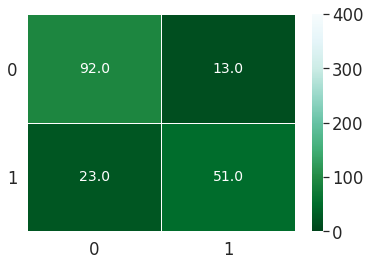

In [46]:
matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=400, cmap = "BuGn_r", linewidths=.6, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

roc_auc 0.8463320463320464


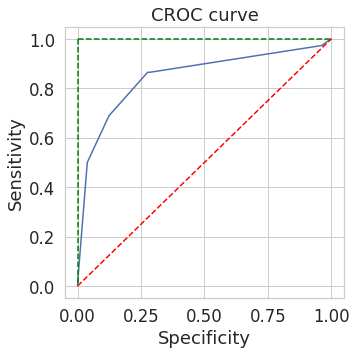

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_pipeline.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('CROC curve')
plt.plot(tfp,tvp)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [48]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, model_pipeline_pred)
print("Pipeline")
print("\n")
print(class_report)

Pipeline


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_pipeline_pred)
Recall = recall_score(y_test, model_pipeline_pred)
Accuracy = accuracy_score(y_test, model_pipeline_pred)
F1_Score = f1_score(y_test, model_pipeline_pred)

precisao = pd.DataFrame({
    
    "Metrics" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Result": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Result", ascending = False)

,Metrics,Result
2,Accuracy,0.798883
0,precision,0.796875
3,F1_Score,0.739130
1,Recall,0.689189


In [50]:
import pickle
    
with open('model_pipeline_pred.pkl', 'wb') as file:
    pickle.dump(model_pipeline_pred, file)